### R

![title](simpletree.png)

![title](treeOfLife.png)

![title](treeRadial.png)

![title](tree2.svg)

![title](tree3.svg)

![title](tree4.svg)

### Python

In [9]:
import requests          
import pylab             
from io import StringIO  
from Bio import Phylo    
import matplotlib.pyplot
import random
from ete3 import *

#### Python: Bio::Phylo

In [10]:
# 11. читает дерево https://www.jasondavies.com/tree-of-life/life.txt сначала как строку
# затем делает из строки дерево

raw_tree = StringIO(requests.get('https://www.jasondavies.com/tree-of-life/life.txt').text)
tree1 = Phylo.read(raw_tree, "newick")

In [16]:
# 12. рисует это дерево псевдографикой (draw_ascii)

Phylo.draw_ascii(tree1)

                             , Escherichia_coli_EDL933
                             |
                             | Escherichia_coli_O157_H7
                             |
                             , Escherichia_coli_O6
                             |
                             | Escherichia_coli_K12
                             |
                             , Shigella_flexneri_2a_2457T
                             |
                             | Shigella_flexneri_2a_301
                             |
                             , Salmonella_enterica
                             |
                             | Salmonella_typhi
                             |
                             | Salmonella_typhimurium
                             |
                             , Yersinia_pestis_Medievalis
                             |
                             , Yersinia_pestis_KIM
                             |
                            ,| Yersinia_pestis_CO92
                 

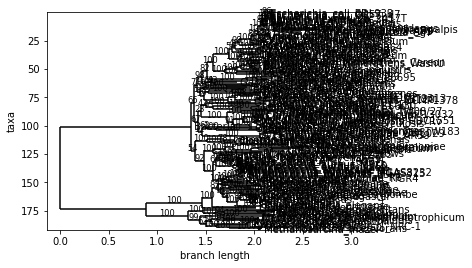

In [11]:
# 13. рисует дерево с помощью draw

Phylo.draw(tree1, do_show=False) 

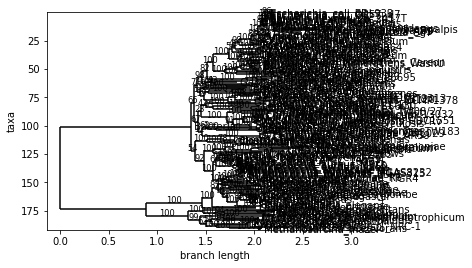

In [12]:
# 14. сохраняет изображение дерева в растровый формат (png) и векторный (svg/pdf)

Phylo.draw(tree1, do_show=False)
matplotlib.pyplot.savefig("py_tree1_phylo.svg")
matplotlib.pyplot.savefig("py_tree1_phylo.png")

<Figure size 1728x864 with 0 Axes>

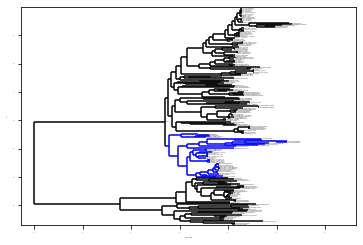

In [15]:
# 15. рисует дерево в более-менее читаемом виде

tree1 = tree1.as_phyloxml()
Phylo.write(tree1, "tree1.xml", "phyloxml")
tree1.clade[0, 1].color = "blue"
matplotlib.rc('font', size=1)
matplotlib.pyplot.figure(figsize=(24,12))
Phylo.draw(tree1, do_show = False)
matplotlib.pyplot.savefig("py_tree1_phylo_blue.png", dpi=600)

![title](py_tree1_phylo_blue.png)

#### Python. ETE (ETE3)

In [16]:
# 16. читает дерево
raw_tree = requests.get('https://www.jasondavies.com/tree-of-life/life.txt').text # читает дерево
tree2 = Tree(raw_tree, format=1)

In [17]:
# 17. рисует это дерево

tree2.render("py_tree2_ete3.pdf")

{'nodes': [[0.5, 3148.8314170837402, 4.5, 3152.8314170837402, 0, None],
  [94.93873437447068,
   2314.0419845581055,
   98.93873437447068,
   2318.0419845581055,
   1,
   None],
  [99.73147803109862,
   1830.119857788086,
   103.73147803109862,
   1834.119857788086,
   2,
   None],
  [105.08318371218537,
   1455.1713562011719,
   109.08318371218537,
   1459.1713562011719,
   3,
   None],
  [111.84415122463498,
   1307.9911499023438,
   115.84415122463498,
   1311.9911499023438,
   4,
   None],
  [117.84425285409398,
   1176.6072998046875,
   121.84425285409398,
   1180.6072998046875,
   5,
   None],
  [125.11336766150616,
   1007.277099609375,
   129.11336766150617,
   1011.277099609375,
   6,
   None],
  [139.57242792777532,
   830.33544921875,
   143.57242792777532,
   834.33544921875,
   7,
   None],
  [144.82724685795588,
   729.4521484375,
   148.82724685795588,
   733.4521484375,
   8,
   None],
  [149.50413293133235,
   666.404296875,
   153.50413293133235,
   670.404296875,
   

In [18]:
# 18. рисует это дерево в читаемом виде

circular_style = TreeStyle()
circular_style.mode = "c"
circular_style.scale = 20
tree2.render("py_tree2_ete3_circ.pdf", tree_style=circular_style)

{'nodes': [[1048.3518287388958,
   1047.2444734304022,
   1053.1767744510614,
   1052.0694191425678,
   0,
   None],
  [1017.3325501678523,
   1044.2807700434512,
   1021.8649826172257,
   1048.8132024928248,
   1,
   None],
  [1018.1116526900043,
   1066.762384645658,
   1023.6075408826651,
   1072.2582728383186,
   2,
   None],
  [1030.0014432350574,
   1082.9432042777744,
   1035.4128451678966,
   1088.3546062106136,
   3,
   None],
  [1036.6901757576375,
   1090.2291381291273,
   1041.6393110213946,
   1095.1782733928844,
   4,
   None],
  [1044.5848236731188,
   1095.9199798864802,
   1048.9369122346475,
   1100.2720684480087,
   5,
   None],
  [1056.4851909563602,
   1099.7348420335777,
   1061.034984292167,
   1104.284635369385,
   6,
   None],
  [1071.106227413126,
   1101.7607866775638,
   1076.3512561486125,
   1107.0058154130504,
   7,
   None],
  [1080.2972719836403,
   1100.9929350394755,
   1085.7919319800264,
   1106.4875950358617,
   8,
   None],
  [1086.929433517204,
 

![title](py_tree2_ete3_circ.svg)

In [19]:
# 19. вырезает (функция prune) из дерева случайный набор из 42 (можно другое число) листьев 

ss = random.sample(tree2.get_leaf_names(), 42)
tree2.prune(ss)

# 20. рисует обрезанное дерево

tree2.render("py_tree2_ete3_random.pdf")

{'nodes': [[0.5, 690.3280029296875, 4.5, 694.3280029296875, 0, None],
  [111.78724898031962,
   497.593505859375,
   115.78724898031962,
   501.593505859375,
   1,
   None],
  [116.91032384603383,
   357.21826171875,
   120.91032384603383,
   361.21826171875,
   2,
   None],
  [122.69535516080862,
   232.4365234375,
   126.69535516080862,
   236.4365234375,
   3,
   None],
  [127.87780551407494, 69.4375, 131.87780551407494, 73.4375, 4, None],
  [134.35367865023292, 36.375, 138.35367865023292, 40.375, 5, None],
  [161.2346602179776, 10.5, 165.2346602179776, 14.5, 6, None],
  [143.48861078298083, 62.25, 147.48861078298083, 66.25, 7, None],
  [162.89068803352131, 45.0, 166.89068803352131, 49.0, 8, None],
  [178.8650344351082, 33.5, 182.8650344351082, 37.5, 9, None],
  [174.08370294425748, 56.5, 178.08370294425748, 60.5, 10, None],
  [156.12830142420935, 79.5, 160.12830142420935, 83.5, 11, None],
  [163.7638019034034, 102.5, 167.7638019034034, 106.5, 12, None],
  [130.75109768872446,
   39

![title](py_tree2_ete3_random.svg)

In [20]:
ts = TreeStyle()
ts.branch_vertical_margin = 15

In [21]:
nstyle = NodeStyle()
nstyle["shape"] = "square"
nstyle["size"] = 5 
nstyle["fgcolor"] = "lightblue"
for leaf in tree2.traverse(): 
    leaf.set_style(nstyle)

tree2.render("py_tree2_ete3_random_improved.png", tree_style=ts)

{'nodes': [[0.5, 1140.194091796875, 6.5, 1146.194091796875, 0, None],
  [113.78724898031962,
   821.76318359375,
   119.78724898031962,
   827.76318359375,
   1,
   None],
  [120.91032384603383,
   589.8388671875,
   126.91032384603383,
   595.8388671875,
   2,
   None],
  [128.69535516080862,
   383.677734375,
   134.69535516080862,
   389.677734375,
   3,
   None],
  [135.87780551407494, 114.375, 141.87780551407494, 120.375, 4, None],
  [144.35367865023292, 59.75, 150.35367865023292, 65.75, 5, None],
  [173.2346602179776, 17.0, 179.2346602179776, 23.0, 6, None],
  [155.48861078298083, 102.5, 161.48861078298083, 108.5, 7, None],
  [176.89068803352131, 74.0, 182.89068803352131, 80.0, 8, None],
  [194.8650344351082, 55.0, 200.8650344351082, 61.0, 9, None],
  [190.08370294425748, 93.0, 196.08370294425748, 99.0, 10, None],
  [170.12830142420935, 131.0, 176.12830142420935, 137.0, 11, None],
  [173.7638019034034, 169.0, 179.7638019034034, 175.0, 12, None],
  [138.75109768872446,
   652.9804

![title](py_tree2_ete3_random_improved.png)